In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
diabets = datasets.load_diabetes()

In [3]:
diabets

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
df = pd.DataFrame(diabets.data, columns=diabets.feature_names)

In [6]:
df['target'] = diabets.target

In [7]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.017646   151.0  
1   -0.039493 -0.068330 -0.092204    75.0  
2   -0.002592  0.002864 -0.025930   141.0  
3    0.034309  0.022692 -0.009362   206.0  
4   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  

[442 rows x 11 columns]

In [8]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [9]:
import seaborn as sns

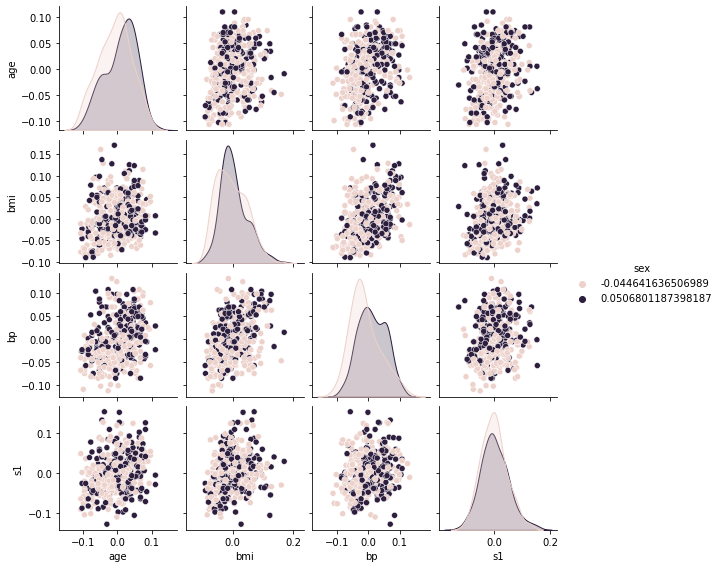

In [10]:
sns.pairplot(df[['age', 'sex', 'bmi', 'bp', 's1']], height=2, hue='sex')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('target', axis = 1)

In [13]:
Y = df['target']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression # RMSE / MSE
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
models = {'kNN' : KNeighborsRegressor(n_neighbors = 3), 'linerg' : LinearRegression()}

In [ ]:
# 직접해보기
np.sqrt(mean_squared_error(pred, x_test))

In [18]:
for name, model in models.items() :
    print(name, model)

kNN KNeighborsRegressor(n_neighbors=3)
linerg LinearRegression()


In [22]:
# 구현하는 방법 1
for name, model in models.items() :
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    score = np.sqrt(mean_squared_error(pred, y_test))
    print(name, score)

kNN 65.05388541822855
linerg 56.39325169594964


In [23]:
# 구현하는 방법 2
for name, model in models.items() :
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    score = np.sqrt(mean_squared_error(pred, y_test))
    print("{:>3s} : {:0.2f}".format(name, score))

kNN : 65.05
linerg : 56.39


In [24]:
# 강사님과 함께 다시 하기
for name, model in models.items() :
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    score = np.sqrt(mean_squared_error(pred, y_test))
    print("{:>6s} : {:0.2f}".format(name, score))

   kNN : 65.05
linerg : 56.39
